In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import re

In [47]:
path = '/home/mr1142/Documents/Data/NIH'
df = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))
df = df.sample(frac=1).reset_index(drop = True)

In [48]:
random = np.random.randint(0,len(df),300)
df = df.iloc[random].reset_index(drop=True)

In [7]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00015147_003.png,Atelectasis|Infiltration,3,15147,56,F,PA,2578,2769,0.143,0.143,NaN
1,00004356_000.png,No Finding,0,4356,41,F,PA,2048,2500,0.171,0.171,NaN
2,00028063_000.png,No Finding,0,28063,57,F,PA,2982,2265,0.143,0.143,NaN
3,00012622_014.png,Infiltration,14,12622,32,F,AP,2500,2048,0.168,0.168,NaN
4,00000003_006.png,Hernia,6,3,79,F,PA,2992,2991,0.143,0.143,NaN


In [8]:
labels = np.unique(df['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [9]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [10]:
for lab in labels:
    df[lab] = list(map(lambda x: fill_label(x, lab), df['Finding Labels'].tolist()))

In [10]:
path = '/home/mr1142/Documents/Data/NIH'

In [29]:
def charge_specific_img(img_name):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    for folder in subfolders:
        img_path = os.path.join(folder, 'images', img_name)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            return img
    img = []
    return img

In [30]:
images = list(map(charge_specific_img, df['Image Index']))

In [32]:
len(images)

300

In [33]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/segmentation', df['Image Index'][i])
    cv2.imwrite(p, img)

# SECOND

Cargo el dataset y lo ordeno aleatorio

In [19]:
path = '/home/mr1142/Documents/Data/NIH'
df = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))
df = df.sample(frac=1).reset_index(drop = True)

In [20]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00019313_006.png,No Finding,6,19313,65,M,AP,2500,2048,0.168,0.168,NaN
1,00016092_007.png,No Finding,7,16092,33,M,AP,3056,2544,0.139,0.139,NaN
2,00026292_006.png,No Finding,6,26292,75,M,PA,3056,2544,0.139,0.139,NaN
3,00004812_000.png,No Finding,0,4812,50,F,PA,2500,2048,0.171,0.171,NaN
4,00008230_023.png,Effusion,23,8230,60,F,PA,2048,2500,0.168,0.168,NaN


Para seleccionar patologicas

In [23]:
patologic = [i for i in df.index if not bool(re.search('No Finding', df['Finding Labels'][i]))]
df = df.iloc[patologic].reset_index(drop=True)

In [24]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11


Recojo las imagenes que ya tenemos

In [5]:
p_already = '/home/mr1142/Documents/Data/segmentation/images'
already = os.listdir(p_already)

In [6]:
already = already + os.listdir('/home/mr1142/Documents/Data/new_images')

In [7]:
len(already)

500

Cojo un numero de indices aleatorios, que no coincidan con las imagenes que ya tenemos

In [8]:
random = []
for i in range(200):
    rand=np.random.randint(0,len(df))
    while(df['Image Index'][rand] in already):
        rand=np.random.randint(0,len(df))
    random.append(rand)

In [9]:
set(list(df['Image Index'][random])).intersection(already)

set()

In [10]:
df = df.iloc[random].reset_index(drop=True)

In [11]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00005176_001.png,Infiltration,1,5176,66,M,AP,2500,2048,0.171,0.171,NaN
1,00006481_023.png,Cardiomegaly|Infiltration,23,6481,52,M,AP,2500,2048,0.168,0.168,NaN
2,00000914_004.png,No Finding,4,914,68,M,PA,2500,2048,0.168,0.168,NaN
3,00011964_000.png,No Finding,0,11964,59,F,PA,2658,2553,0.143,0.143,NaN
4,00005296_000.png,Mass,0,5296,51,F,AP,2500,2048,0.171,0.171,NaN


In [26]:
labels = np.unique(df['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [27]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [28]:
for lab in labels:
    df[lab] = list(map(lambda x: fill_label(x, lab), df['Finding Labels'].tolist()))

In [29]:
for l in labels:
    print(l)
    print(sum(df[l] == 1))

Effusion
1
No Finding
7


In [30]:
path = '/home/mr1142/Documents/Data/NIH'

In [31]:
def charge_specific_img(img_name):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    for folder in subfolders:
        img_path = os.path.join(folder, 'images', img_name)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            return img
    img = []
    return img

In [32]:
images = list(map(charge_specific_img, df['Image Index']))

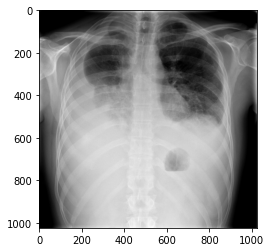

In [33]:
import matplotlib.pyplot as plt
i = np.random.randint(0,len(df))
plt.imshow(images[i])

In [34]:
len(images)

8

In [35]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/new_images', df['Image Index'][i])
    cv2.imwrite(p, img)